<a href="https://colab.research.google.com/github/Pam-Pam29/ADVANCED-LINEAR-ALGEBRA-PCA-Group-19/blob/main/Template_PCA_Formative_1%5B19%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

In [1]:

!pip install kaggle


def setup_kaggle():
    from google.colab import files
    print("Please upload your kaggle.json file:")
    uploaded = files.upload()

    !mkdir -p ~/.kaggle
    !mv kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
    print("Kaggle setup complete!")

def download_dataset():
    !kaggle datasets download -d "waalbannyantudre/african-cigarette-prices"
    !unzip "african-cigarette-prices.zip"
    !ls -la
    print("Dataset downloaded and extracted!")

setup_kaggle()

download_dataset()

Please upload your kaggle.json file:


Saving kaggle.json to kaggle.json
Kaggle setup complete!
Dataset URL: https://www.kaggle.com/datasets/waalbannyantudre/african-cigarette-prices
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/6.54M [00:00<?, ?B/s]
100% 6.54M/6.54M [00:00<00:00, 779MB/s]
Archive:  african-cigarette-prices.zip
  inflating: acp-r1-r12-2016-2022-v1.6.csv  
total 51560
drwxr-xr-x 1 root root     4096 Jun  9 14:05 .
drwxr-xr-x 1 root root     4096 Jun  9 14:04 ..
-rw-r--r-- 1 root root 45921402 Feb 28  2024 acp-r1-r12-2016-2022-v1.6.csv
-rw-r--r-- 1 root root  6854964 Feb 28  2024 african-cigarette-prices.zip
drwxr-xr-x 4 root root     4096 Jun  5 13:38 .config
drwxr-xr-x 1 root root     4096 Jun  5 13:38 sample_data
Dataset downloaded and extracted!


In [8]:
import pandas as pd

encodings_to_try = ['latin-1', 'iso-8859-1', 'cp1252', 'utf-8-sig']

df = None
for encoding in encodings_to_try:
    try:
        print(f"Trying encoding: {encoding}")
        df = pd.read_csv('acp-r1-r12-2016-2022-v1.6.csv', encoding=encoding)
        print(f"✅ Success with encoding: {encoding}")
        break
    except UnicodeDecodeError as e:
        print(f"❌ Failed with {encoding}: {str(e)[:100]}...")
        continue

if df is not None:
    print(f"Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    df.head()
else:
    print("All encodings failed. Let's try a different approach.")

Trying encoding: latin-1


<ipython-input-8-bf700f928636>:10: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('acp-r1-r12-2016-2022-v1.6.csv', encoding=encoding)


✅ Success with encoding: latin-1
Dataset loaded successfully!
Shape: (215449, 28)
Columns: ['Store_ID', 'Round', 'Fieldworker_Code', 'Country', 'Currency', 'Day', 'Month', 'Year', 'Date', 'Province', 'City', 'Suburb', 'Outlet_Type', 'Retail_Subtype', 'Outlet_Name', 'Product', 'Brand', 'Sub_Brand', 'Quantity', 'Unusual_Quantity_Flg', 'Local_Price', 'Local_Price_Per_Stick_Cigarette', 'Dollar_Exchange_Rate', 'Dollar_Price', 'Dollar_Price_Per_Stick_Cigarett', 'Dollar_Price_Pack_Cigarettes', 'Fieldworker_Comment', 'Data_Cleaner_Comment']


In [10]:
df.head()

,Store_ID,Round,Fieldworker_Code,Country,Currency,Day,Month,Year,Date,Province,...,Quantity,Unusual_Quantity_Flg,Local_Price,Local_Price_Per_Stick_Cigarette,Dollar_Exchange_Rate,Dollar_Price,Dollar_Price_Per_Stick_Cigarett,Dollar_Price_Pack_Cigarettes,Fieldworker_Comment,Data_Cleaner_Comment
0,123.0,1,F,Lesotho,LSL,18.0,1.0,2016.0,18jan2016,Lowlands,...,1.0,0.0,2.50,2.5000,16.3,0.153374,0.153374,3.067485,NaN,NaN
1,51.0,1,B,Namibia,NAD,18.0,1.0,2016.0,18jan2016,Khomas,...,20.0,0.0,20.00,1.0000,16.3,1.226994,0.061350,1.226994,NaN,NaN
2,51.0,1,B,Namibia,NAD,18.0,1.0,2016.0,18jan2016,Khomas,...,20.0,0.0,36.99,1.8495,16.3,2.269325,0.113466,2.269325,NaN,NaN
3,52.0,1,B,Namibia,NAD,19.0,1.0,2016.0,19jan2016,Khomas,...,20.0,0.0,37.00,1.8500,16.3,2.269939,0.113497,2.269939,NaN,NaN
4,33.0,1,A,Uganda,UGX,22.0,1.0,2016.0,22jan2016,Central Uganda,...,20.0,0.0,3500.00,175.0000,3440.9,1.017176,0.050859,1.017176,NaN,NaN


In [17]:
numerical_columns = df.select_dtypes(include=np.number).columns
dataset = df[numerical_columns]
dataset.head()

,Day,Month,Year,Quantity,Unusual_Quantity_Flg,Local_Price,Local_Price_Per_Stick_Cigarette,Dollar_Exchange_Rate,Dollar_Price,Dollar_Price_Per_Stick_Cigarett,Dollar_Price_Pack_Cigarettes
0,18.0,1.0,2016.0,1.0,0.0,2.50,2.5000,16.3,0.153374,0.153374,3.067485
1,18.0,1.0,2016.0,20.0,0.0,20.00,1.0000,16.3,1.226994,0.061350,1.226994
2,18.0,1.0,2016.0,20.0,0.0,36.99,1.8495,16.3,2.269325,0.113466,2.269325
3,19.0,1.0,2016.0,20.0,0.0,37.00,1.8500,16.3,2.269939,0.113497,2.269939
4,22.0,1.0,2016.0,20.0,0.0,3500.00,175.0000,3440.9,1.017176,0.050859,1.017176


### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

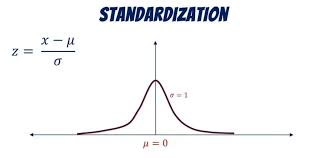


In [20]:
data_mean = np.mean(dataset, axis=0)
print (data_mean)
data_std = np.std(dataset, axis=0)
print (data_std)

Day                                  16.399421
Month                                 6.497890
Year                               2018.301670
Quantity                             18.389625
Unusual_Quantity_Flg                  0.009240
Local_Price                          89.397768
Local_Price_Per_Stick_Cigarette      10.630443
Dollar_Exchange_Rate                 66.657855
Dollar_Price                          1.603247
Dollar_Price_Per_Stick_Cigarett       0.165483
Dollar_Price_Pack_Cigarettes          2.881196
dtype: float64
Day                                  8.707113
Month                                3.816190
Year                                41.040834
Quantity                           120.281470
Unusual_Quantity_Flg                 0.095680
Local_Price                        752.136874
Local_Price_Per_Stick_Cigarette    429.267136
Dollar_Exchange_Rate               301.494585
Dollar_Price                         6.721049
Dollar_Price_Per_Stick_Cigarett      0.882898
Dollar_P

In [23]:
# Step 1: Load and Standardize the data (use of numpy only allowed)
standardized_data = (dataset - data_mean) / data_std
standardized_data[:10]

,Day,Month,Year,Quantity,Unusual_Quantity_Flg,Local_Price,Local_Price_Per_Stick_Cigarette,Dollar_Exchange_Rate,Dollar_Price,Dollar_Price_Per_Stick_Cigarett,Dollar_Price_Pack_Cigarettes
0,0.183824,-1.440675,-0.056082,-0.144574,-0.096572,-0.115535,-0.018940,-0.167027,-0.215721,-0.013715,0.012871
1,0.183824,-1.440675,-0.056082,0.013388,-0.096572,-0.092267,-0.022435,-0.167027,-0.055981,-0.117945,-0.114288
2,0.183824,-1.440675,-0.056082,0.013388,-0.096572,-0.069678,-0.020456,-0.167027,0.099103,-0.058916,-0.042274
3,0.298673,-1.440675,-0.056082,0.013388,-0.096572,-0.069665,-0.020454,-0.167027,0.099195,-0.058882,-0.042232
4,0.643219,-1.440675,-0.056082,0.013388,-0.096572,4.534550,0.382907,11.191717,-0.087199,-0.129828,-0.128785
5,0.183824,-1.440675,-0.056082,0.013388,-0.096572,-0.069665,-0.020454,-0.167027,0.099195,-0.058882,-0.042232
6,-0.045873,-1.440675,-0.056082,-0.144574,-0.096572,-0.114870,-0.017776,-0.167027,-0.211157,0.021028,0.055257
7,-0.160722,-1.440675,-0.056082,-0.069750,-0.096572,-0.086883,-0.019162,-0.182948,0.072616,0.049436,0.089914
8,0.872916,-1.440675,-0.056082,0.013388,-0.096572,-0.068336,-0.020338,-0.167027,0.108323,-0.055407,-0.037993
9,0.643219,-1.440675,-0.056082,0.013388,-0.096572,9.187958,0.790579,11.191717,0.064142,-0.072223,-0.058508


In [24]:
print(f"\nVerification - Mean of standardized data: {np.mean(standardized_data, axis=0)}")
print(f"Verification - Std of standardized data: {np.std(standardized_data, axis=0)}")



Verification - Mean of standardized data: Day                                4.616708e-16
Month                             -7.546159e-17
Year                              -1.030473e-14
Quantity                           1.505275e-17
Unusual_Quantity_Flg              -1.769268e-17
Local_Price                       -2.218218e-17
Local_Price_Per_Stick_Cigarette   -5.465739e-18
Dollar_Exchange_Rate               2.508664e-17
Dollar_Price                      -1.637264e-17
Dollar_Price_Per_Stick_Cigarett   -1.621447e-17
Dollar_Price_Pack_Cigarettes       2.267490e-17
dtype: float64
Verification - Std of standardized data: Day                                1.0
Month                              1.0
Year                               1.0
Quantity                           1.0
Unusual_Quantity_Flg               1.0
Local_Price                        1.0
Local_Price_Per_Stick_Cigarette    1.0
Dollar_Exchange_Rate               1.0
Dollar_Price                       1.0
Dollar_Price_Per_Stick

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [ ]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = None  # Calculate covariance matrix
cov_matrix

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [ ]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = None  # Perform eigendecomposition
eigenvalues, eigenvectors

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [ ]:
# Step 5: Sort Principal Components
sorted_indices = None  # Sort eigenvalues in descending order
sorted_eigenvectors = None  # Sort eigenvectors accordingly
sorted_eigenvectors

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [ ]:
# Step 6: Project Data onto Principal Components
num_components = None  # Decide on the number of principal components to keep
reduced_data = None  # Project data onto the principal components
reduced_data[:5]

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [ ]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

In [ ]:
# Step 8: Visualize Before and After PCA


# Plot original data (first two features for simplicity)


# Plot reduced data after PCA
